# Results for Pentaspectrum, $\langle M_\mathrm{ap}^6 \rangle$, $T_7$ etc

In [22]:
%matplotlib widget

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, widgets
from matplotlib.colors import LogNorm

In [24]:
# Load data for Pentaspectrum
lbins=5
ells=np.geomspace(150, 40000, lbins)

data_all=np.loadtxt("/vol/aibn238/data1/llinke/5_Projects/02_3ptStatistics/results_MR/Pentaspec_halomodel")[:,-1]
data_all=data_all.reshape((lbins, lbins, lbins, lbins, lbins, lbins))


In [25]:
# Function for plotting of pentaspectrum
def update_pentaspectrum(l3_ix, l4_ix, l5_ix, l6_ix):
    data_now=data_all[:, :, l3_ix, l4_ix, l5_ix, l6_ix]
    im=ax.imshow(data_now, norm=LogNorm())
    titleobj.set_text(r"$\ell_3={:.1e}, \ell_4={:.1e}, \ell_5={:.1e}, \ell_6={:.1e}$".format(ells[l3_ix], ells[l4_ix], ells[l5_ix], ells[l6_ix]))
    #fig.colorbar(im)
    cbar.update_normal(im)
    fig.canvas.draw()


interactive(children=(IntSlider(value=2, description='l3_ix', max=4), IntSlider(value=2, description='l4_ix', …

<function __main__.update_pentaspectrum(l3_ix, l4_ix, l5_ix, l6_ix)>

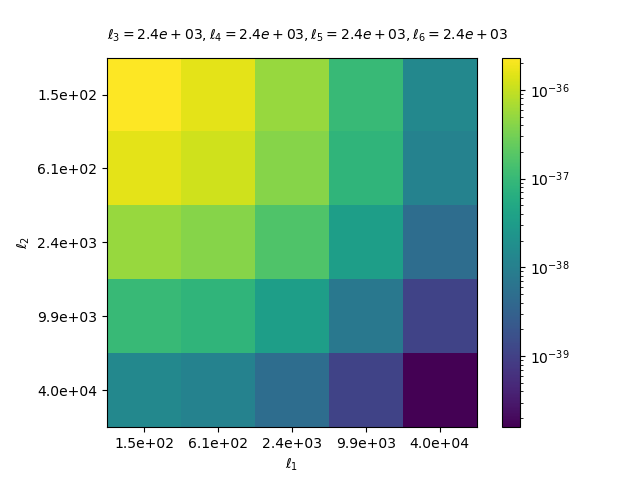

In [26]:
# Plot Projected Pentaspectrum
fig = plt.figure()
ax=fig.add_subplot(111)
im=ax.imshow(data_all[:,:,0,0,0,0])
ax.set_xlabel(r"$\ell_1$")
ax.set_ylabel(r"$\ell_2$")
ax.set_xticks(range(lbins))
ax.set_yticks(range(lbins))
ax.set_xticklabels([f"{ells[i]:.1e}" for i in range(lbins)])
ax.set_yticklabels([f"{ells[i]:.1e}" for i in range(lbins)])
#ax.set_title("Projected Pentaspectrum")
cbar=fig.colorbar(im)
titleobj=ax.text(-0.5, -0.75, r"$\ell_3={:.2e}$".format(ells[0]), backgroundcolor='#FFFFFF')

interact(update_pentaspectrum,
        l3_ix=(0, lbins-1),
        l4_ix=(0, lbins-1),
        l5_ix=(0, lbins-1),
        l6_ix=(0, lbins-1),
        plotIntegrand=True)



### The above plot shows the Pentaspectrum $P_6(\ell_1, \ell_2, \ell_3, \ell_4, \ell_5, \ell_6)$ with the Limber-integration performed by `cubature`

### $P_6(\ell_1, \ell_2, \ell_3, \ell_4, \ell_5, \ell_6)=(\frac{3\, \Omega_\mathrm{m}\, H_0^2}{2 c^2})^6\, \int \mathrm{d}z \frac{\mathrm{d} \chi}{\mathrm{d} z} \frac{q^6}{\chi^4} \,(1+z)^6\, \int \mathrm{d}{m}\; n(m, z)\, (\frac{m}{\bar{\rho}})^6\, \hat{u}_\mathrm{NFW}(\ell_1/\chi, m, z)\, \hat{u}_\mathrm{NFW}(\ell_2/\chi, m, z)\, \hat{u}_\mathrm{NFW}(\ell_3/\chi, m, z)\, \hat{u}_\mathrm{NFW}(\ell_4/\chi, m, z)\, \hat{u}_\mathrm{NFW}(\ell_5/\chi, m, z)\, \hat{u}_\mathrm{NFW}(\ell_6/\chi, m, z)$

### Problem: The Integral over $P_6$ to get $\langle M_\mathrm{ap}^6\rangle$ seems to not converge, when using `cuba`. The integration points move towards the lower border of $z$ while the estimated error on the integration grows.

### $\langle M_\mathrm{ap}^6 \rangle(\theta_1, \theta_2, \theta_3, \theta_4, \theta_5, \theta_6)=(\frac{3\, \Omega_\mathrm{m}\, H_0^2}{2 (2\pi)^2 c^2})^6\, \int \mathrm{d}\ell_1 \int \mathrm{d}\ell_2 \int \mathrm{d}\ell_3 \int \mathrm{d}\ell_4 \int \mathrm{d}\ell_5 \int \mathrm{d}\ell_6\, \hat{u}(\ell_1 \theta_1)\, \hat{u}(\ell_2 \theta_2)\, \hat{u}(\ell_3 \theta_3)\, \hat{u}(\ell_4 \theta_4)\, \hat{u}(\ell_5 \theta_5)\, \hat{u}(\ell_6 \theta_6)\,     \int \mathrm{d}z \frac{\mathrm{d} \chi}{\mathrm{d} z} \frac{q^6}{\chi^4} \,(1+z)^6\, \int \mathrm{d}{m}\; n(m, z)\, (\frac{m}{\bar{\rho}})^6\, \hat{u}_\mathrm{NFW}(\ell_1/\chi, m, z)\, \hat{u}_\mathrm{NFW}(\ell_2/\chi, m, z)\, \hat{u}_\mathrm{NFW}(\ell_3/\chi, m, z)\, \hat{u}_\mathrm{NFW}(\ell_4/\chi, m, z)\, \hat{u}_\mathrm{NFW}(\ell_5/\chi, m, z)\, \hat{u}_\mathrm{NFW}(\ell_6/\chi, m, z)\, (2\pi)^2 \delta_D(\ell_1+\ell_2+\ell_3+\ell_4+\ell_5+\ell_6)$

### Possible culprit: $\chi^{-4}$! If we set this term to $1$, the integral converges

Text(0.5, 1.0, 'Result of integration of Map6 integrand multiplied by $\\chi^4$')

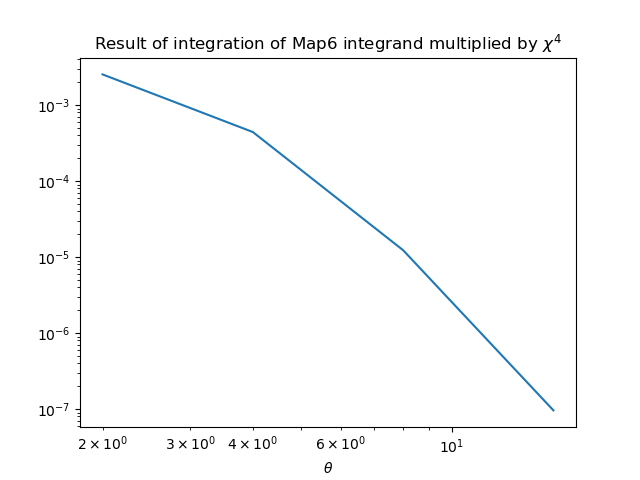

In [21]:
# Insert Plot here

map6=np.loadtxt("/vol/aibn238/data1/llinke/5_Projects/02_3ptStatistics/results_MR/Map6_pentaspec")

fig, ax=plt.subplots()
ax.set_yscale('log')
ax.set_xscale('log')
ax.plot(map6[:,0], map6[:,6])
ax.set_xlabel(r'$\theta$')
#ax.set_ylabel(r'$\langle M_\mathrm{ap}^6 \rangle (\theta, \theta, \theta, \theta)$')
ax.set_title("Result of integration of Map6 integrand multiplied by $\chi^4$")

### The same problem does not happen for $\langle M_\mathrm{ap}^4\rangle$, which does converge. It is given by

### $\langle M_\mathrm{ap}^4 \rangle(\theta_1, \theta_2, \theta_3, \theta_4)=(\frac{3\, \Omega_\mathrm{m}\, H_0^2}{2 (2\pi)^2 c^2})^4\, \int \mathrm{d}\ell_1 \int \mathrm{d}\ell_2 \int \mathrm{d}\ell_3 \int \mathrm{d}\ell_4 \, \hat{u}(\ell_1 \theta_1)\, \hat{u}(\ell_2 \theta_2)\, \hat{u}(\ell_3 \theta_3)\, \hat{u}(\ell_4 \theta_4)\,   \int \mathrm{d}z \frac{\mathrm{d} \chi}{\mathrm{d} z} \frac{q^4}{\chi^2} \,(1+z)^4\, \int \mathrm{d}{m}\; n(m, z)\, (\frac{m}{\bar{\rho}})^4\, \hat{u}_\mathrm{NFW}(\ell_1/\chi, m, z)\, \hat{u}_\mathrm{NFW}(\ell_2/\chi, m, z)\, \hat{u}_\mathrm{NFW}(\ell_3/\chi, m, z)\, \hat{u}_\mathrm{NFW}(\ell_4/\chi, m, z)\,  (2\pi)^2 \delta_D(\ell_1+\ell_2+\ell_3+\ell_4)$

Text(0, 0.5, '$\\langle M_\\mathrm{ap}^4 \\rangle (\\theta, \\theta, \\theta, \\theta)$')

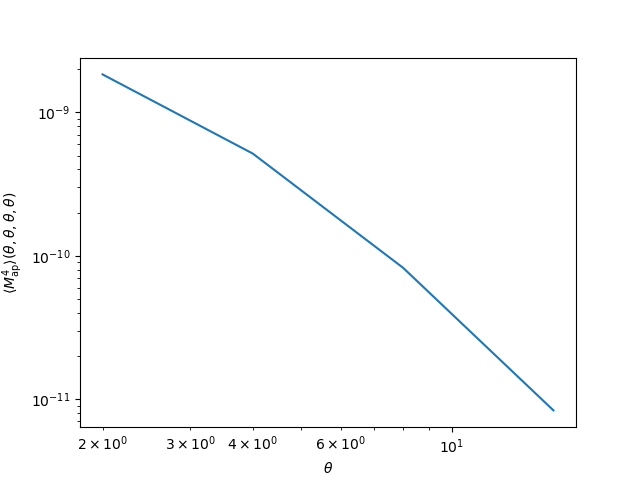

In [17]:
# Insert <Map⁴> plot here

map4=np.loadtxt("/vol/aibn238/data1/llinke/5_Projects/02_3ptStatistics/results_MR/Map4_trispec_diag_newCode")

fig, ax=plt.subplots()
ax.set_yscale('log')
ax.set_xscale('log')
ax.plot(map4[:,0], map4[:,4])
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\langle M_\mathrm{ap}^4 \rangle (\theta, \theta, \theta, \theta)$')
